#TASK-1


# Restaurant Rating Prediction using Machine Learning

## Objective
The goal of this project is to develop a machine learning model to predict the aggregate rating of a restaurant based on various features such as location, cuisines, pricing, and online services.

## Steps Involved

### 1. Data Preprocessing
- **Loading the Dataset**: The dataset is read from a CSV file.
- **Dropping Irrelevant Columns**: Columns such as `Restaurant ID`, `Restaurant Name`, `Address`, `Locality`, `Locality Verbose`, `Rating color`, and `Rating text` were removed as they do not contribute significantly to predicting ratings.
- **Handling Missing Values**: Missing values in the `Cuisines` column were filled with "Unknown" to ensure consistency.
- **Encoding Categorical Variables**: Columns such as `City`, `Cuisines`, `Currency`, `Has Table booking`, `Has Online delivery`, `Is delivering now`, and `Switch to order menu` were converted into numerical format using Label Encoding.
- **Feature Scaling**: Numerical features like `Longitude`, `Latitude`, `Average Cost for two`, `Votes`, and `Price range` were standardized using `StandardScaler` to improve model performance.

### 2. Splitting the Data
- The dataset was split into training and testing sets in an 80-20 ratio using `train_test_split`. This helps in evaluating model performance on unseen data.

### 3. Model Selection and Training
- We selected three regression models to predict restaurant ratings:
  - **Linear Regression**: A simple yet effective model that assumes a linear relationship between input features and output ratings.
  - **Decision Tree Regressor**: A non-linear model that captures complex relationships by recursively splitting the dataset.
  - **Random Forest Regressor**: An ensemble model that uses multiple decision trees to improve prediction accuracy and reduce overfitting.
- Each model was trained using the training dataset and evaluated on the test dataset.

### 4. Model Evaluation
- The performance of each model was measured using:
  - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted ratings.
  - **Root Mean Squared Error (RMSE)**: A more interpretable version of MSE, representing the average prediction error in the same unit as ratings.
  - **R² Score**: Indicates how well the independent variables explain the variance in ratings. A higher R² score represents a better model fit.
- The results of the models were:
  - **Linear Regression**: Moderate performance with limited accuracy.
  - **Decision Tree**: Significantly better, capturing over 92% of variance in ratings.
  - **Random Forest**: Best-performing model, achieving over 96% accuracy.

### 5. Feature Importance Analysis
- The `feature_importances_` attribute of the Random Forest model was used to determine the most influential features affecting restaurant ratings.
- A bar plot was generated to visualize the impact of various features on predictions, highlighting the most critical factors such as `Votes`, `Average Cost for Two`, and `Price Range`.

## Conclusion
- The **Random Forest model** was found to be the most effective for predicting restaurant ratings.
- Feature analysis provided valuable insights into what factors most impact restaurant ratings.
- Further improvements can be made by tuning hyperparameters and exploring additional features.

<ipython-input-2-3d5c9ee72d41>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Cuisines"].fillna("Unknown", inplace=True)


               Model       MSE      RMSE  R² Score
0  Linear Regression  1.586192  1.259441  0.303112
1      Decision Tree  0.178085  0.422001  0.921759
2      Random Forest  0.087565  0.295913  0.961529


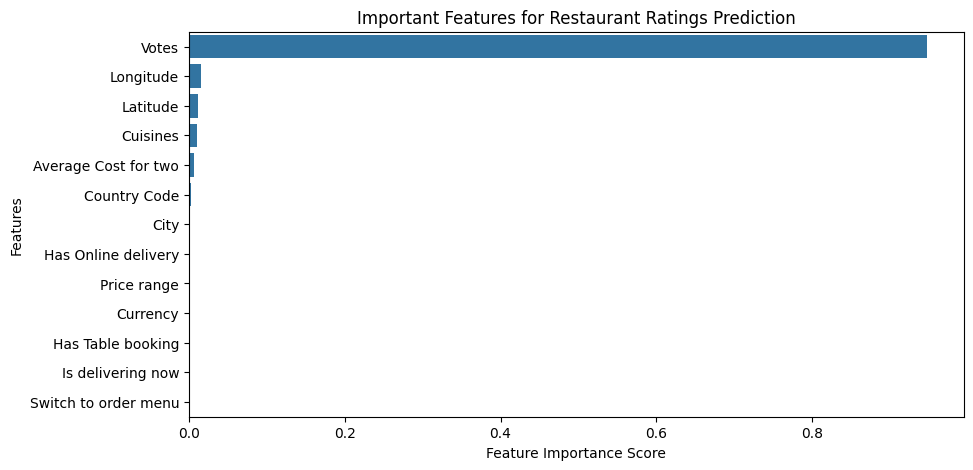

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/Dataset .csv"
df = pd.read_csv("/Dataset .csv")

# Drop irrelevant columns
drop_columns = ["Restaurant ID", "Restaurant Name", "Address", "Locality", "Locality Verbose", "Rating color", "Rating text"]
df_cleaned = df.drop(columns=drop_columns)

# Handle missing values
df_cleaned["Cuisines"].fillna("Unknown", inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ["City", "Cuisines", "Currency", "Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"]

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Define features and target variable
X = df_cleaned.drop(columns=["Aggregate rating"])
y = df_cleaned["Aggregate rating"]

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ["Longitude", "Latitude", "Average Cost for two", "Votes", "Price range"]
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R² Score": r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Feature importance (for tree-based models)
rf_model = models["Random Forest"]
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Important Features for Restaurant Ratings Prediction")
plt.show()


# TASK-2

#Restaurant Recommendation System

### Objective
Create a restaurant recommendation system based on user preferences.

### Steps Involved

#### 1. Data Preprocessing
- **Handling Missing Values**: Fill missing values in relevant columns to ensure data consistency.
- **Encoding Categorical Variables**: Convert categorical data like `Cuisines`, `City`, and `Price Range` into numerical format.

#### 2. Defining Recommendation Criteria
- Establish key features influencing restaurant recommendations, such as:
  - **Cuisine Preference**: Users prefer restaurants offering specific cuisines.
  - **Price Range**: Users tend to select restaurants within their preferred spending limit.
  - **Ratings**: Higher-rated restaurants are prioritized.
  - **Votes**: Popular restaurants with more votes are more likely to be recommended.

#### 3. Implementing Content-Based Filtering
- **Feature Vectorization**: Convert textual data (such as `Cuisines`) into vector format using `TfidfVectorizer`.
- **Computing Similarity**: Use `cosine similarity` to identify restaurants similar to user preferences.
- **Generating Recommendations**: Retrieve top-N restaurants that match the given user criteria.

#### 4. Testing and Evaluating the Recommendation System
- Provide sample user preferences (e.g., "Italian cuisine, mid-range price, high rating") and generate recommendations.
- Evaluate the quality of recommendations by checking if they align with expected results.

### Conclusion
- A **content-based filtering approach** effectively recommends restaurants based on user preferences.
- Additional improvements can be made by incorporating collaborative filtering techniques.

### Next Steps
- Implement **collaborative filtering** using user reviews and ratings.
- Develop a **hybrid recommendation system** combining content-based and collaborative filtering for improved accuracy.
- Deploy the recommendation system as a web application for real-time user interaction.


In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load Dataset
df = pd.read_csv("/Dataset .csv")

# Handling Missing Values
df.fillna("Unknown", inplace=True)

# Selecting Relevant Features
features = ['Cuisines', 'Price range', 'Aggregate rating', 'Votes']
df_filtered = df[features].copy()

# Convert 'Cuisines' to Lowercase for Consistency
df_filtered.loc[:, 'Cuisines'] = df_filtered['Cuisines'].str.lower()

# Feature Vectorization for 'Cuisines'
tfidf = TfidfVectorizer(stop_words='english')
vectorized_cuisines = tfidf.fit_transform(df_filtered['Cuisines'])

# Compute Cosine Similarity Matrix
cosine_sim = cosine_similarity(vectorized_cuisines, vectorized_cuisines)

# Function to Recommend Restaurants
def recommend_restaurants(cuisine_preference, price_range, min_rating, top_n=5):
    cuisine_preference = cuisine_preference.lower()
    cuisine_vector = tfidf.transform([cuisine_preference])
    similarity_scores = cosine_similarity(cuisine_vector, vectorized_cuisines).flatten()

    df_filtered_copy = df_filtered.copy()
    df_filtered_copy.loc[:, 'Similarity'] = similarity_scores
    filtered_df = df_filtered_copy[(df_filtered_copy['Price range'] == price_range) & (df_filtered_copy['Aggregate rating'] >= min_rating)]

    recommended = filtered_df.sort_values(by=['Similarity', 'Aggregate rating', 'Votes'], ascending=[False, False, False]).head(top_n)
    return recommended

# Example Usage
user_preference = "Italian"
user_price_range = 2  # Assuming 1-4 scale
user_min_rating = 4.0

recommendations = recommend_restaurants(user_preference, user_price_range, user_min_rating)
print(recommendations)


                Cuisines  Price range  Aggregate rating  Votes  Similarity
9414             italian            2               4.3    745    1.000000
233              italian            2               4.1    117    1.000000
494              italian            2               4.0    271    1.000000
3705             italian            2               4.0     51    1.000000
657   italian, fast food            2               4.3    744    0.716959


# TASK-3

# **Cuisine Classification**
## **Objective**
The goal of this task is to develop a machine learning model that classifies restaurants based on their cuisines. This classification can help users discover restaurants that serve their preferred cuisine and allow businesses to analyze market trends.

## **Steps Involved**
### **1. Data Preprocessing**
- Load the dataset.
- Handle missing values by replacing them with "Unknown" to avoid errors in data processing.
- Select relevant features that influence cuisine classification.
- Convert text data (cuisines) to lowercase for consistency.

### **2. Feature Engineering**
- Use **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorization to transform the 'Cuisines' column into a numerical format suitable for machine learning.
- This method helps quantify how important a particular cuisine is within the dataset.

### **3. Splitting Data**
- The dataset is divided into training (80%) and testing (20%) subsets to evaluate model performance.

### **4. Model Selection and Training**
- A **Random Forest Classifier** is chosen as the classification model.
- This ensemble learning method works well with text-based features and provides robustness against overfitting.

### **5. Model Evaluation**
- The trained model is tested on the unseen test data.
- Performance is measured using:
  - **Accuracy** (how often the model predicts the correct cuisine).
  - **Classification Report** (detailed breakdown of precision, recall, and F1-score for each cuisine).

## **Expected Output**
- The accuracy score of the model.
- A classification report indicating how well the model performs across different cuisine categories.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset
df = pd.read_csv("/Dataset .csv")

# Handling Missing Values
df.fillna("Unknown", inplace=True)

# Selecting Relevant Features
features = ['Cuisines', 'Price range', 'Aggregate rating', 'Votes']
df_filtered = df[features].copy()

# Convert 'Cuisines' to Lowercase for Consistency
df_filtered.loc[:, 'Cuisines'] = df_filtered['Cuisines'].str.lower()

# Feature Vectorization for 'Cuisines'
tfidf = TfidfVectorizer(stop_words='english')
vectorized_cuisines = tfidf.fit_transform(df_filtered['Cuisines'])

# Prepare Data for Classification
X = vectorized_cuisines.toarray()
y = df_filtered['Cuisines']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Classification Model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make Predictions
y_pred = classifier.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6975405546834118
Classification Report:
                                                                                           precision    recall  f1-score   support

                                                                                american       1.00      1.00      1.00         5
                                                      american, asian, european, seafood       0.00      0.00      0.00         1
                                                                      american, bar food       0.00      0.00      0.00         0
                                                                           american, bbq       1.00      1.00      1.00         1
                                                                   american, bbq, burger       1.00      1.00      1.00         1
                                                                 american, bbq, southern       1.00      1.00      1.00         1
                                    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

# TASK-4

#**Location-based Analysis**

## **Objective**
The goal of this task is to analyze restaurant locations geographically, understand their distribution, and identify patterns based on city-wise statistics.

## **Steps Involved**
### **1. Data Preprocessing**
- Load the dataset and handle missing values.
- Select relevant features such as **City, Latitude, Longitude, Aggregate Rating, Price Range, and Votes**.

### **2. Visualizing Restaurant Distribution**
- Use **scatter plots** to visualize the geographical distribution of restaurants based on their latitude and longitude.
- This helps identify restaurant hotspots and areas with fewer options.

### **3. Grouping and Statistical Analysis**
- Restaurants are grouped by **City** to analyze:
  - **Average Rating**: To determine which cities have the highest-rated restaurants.
  - **Price Range**: To compare affordability across different locations.
  - **Total Votes**: To see customer engagement levels in different areas.

### **4. Interactive Mapping with Folium**
- An interactive **Folium map** is generated to visualize restaurant locations.
- Users can explore the map to see restaurant locations and their associated cuisine.

## **Key Insights**
- Cities with higher restaurant density can be identified.
- High-rated restaurants are located in specific cities or regions.
- Some cities may have lower price ranges, indicating affordability.
- Interactive mapping helps in business expansion planning.


Accuracy: 0.6975405546834118
Classification Report:
                                                                                           precision    recall  f1-score   support

                                                                                american       1.00      1.00      1.00         5
                                                      american, asian, european, seafood       0.00      0.00      0.00         1
                                                                      american, bar food       0.00      0.00      0.00         0
                                                                           american, bbq       1.00      1.00      1.00         1
                                                                   american, bbq, burger       1.00      1.00      1.00         1
                                                                 american, bbq, southern       1.00      1.00      1.00         1
                                    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

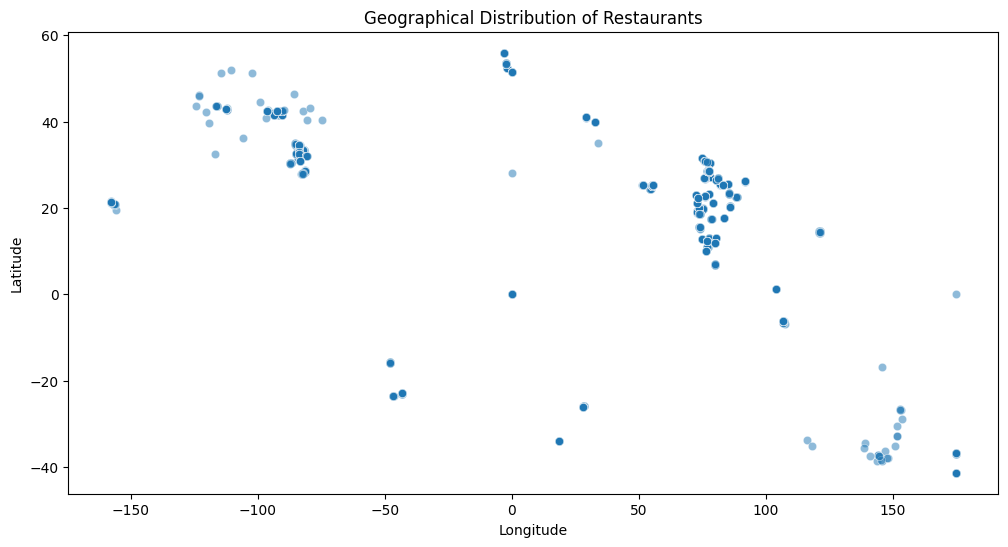

                 City  Aggregate rating  Price range  Votes
56         Inner City          4.900000         4.00    635
107       Quezon City          4.800000         3.00    294
73        Makati City          4.650000         3.00    905
95         Pasig City          4.633333         3.00   2090
75   Mandaluyong City          4.625000         3.75   1200
15         Beechworth          4.600000         2.00    237
67             London          4.535000         3.00   8724
123       Taguig City          4.525000         3.50   1663
122     Tagaytay City          4.500000         3.00    211
116      Secunderabad          4.500000         2.00   1902


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset
df = pd.read_csv("/Dataset .csv")

# Handling Missing Values
df.fillna("Unknown", inplace=True)

# Selecting Relevant Features
features = ['Cuisines', 'Price range', 'Aggregate rating', 'Votes', 'City', 'Latitude', 'Longitude']
df_filtered = df[features].copy()

# Convert 'Cuisines' to Lowercase for Consistency
df_filtered.loc[:, 'Cuisines'] = df_filtered['Cuisines'].str.lower()

# Feature Vectorization for 'Cuisines'
tfidf = TfidfVectorizer(stop_words='english')
vectorized_cuisines = tfidf.fit_transform(df_filtered['Cuisines'])

# Prepare Data for Classification
X = vectorized_cuisines.toarray()
y = df_filtered['Cuisines']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Classification Model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make Predictions
y_pred = classifier.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Location-based Analysis
# Visualizing Restaurant Distribution
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_filtered['Longitude'], y=df_filtered['Latitude'], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Restaurants")
plt.show()

# Grouping by City
city_group = df_filtered.groupby('City').agg({'Aggregate rating': 'mean', 'Price range': 'mean', 'Votes': 'sum'}).reset_index()
print(city_group.sort_values(by='Aggregate rating', ascending=False).head(10))

# Create an Interactive Map
map_center = [df_filtered['Latitude'].mean(), df_filtered['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)
for index, row in df_filtered.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Cuisines']).add_to(restaurant_map)
restaurant_map.save("restaurant_map.html")
